In [1]:
import datetime
import os
from mdagent import MDAgent

In [2]:
prompt24 = "Analyze the rdf of the simulation of 1A3N solvated in water"
llm_var = "gpt-4o-2024-08-06"
tools = "all"
agent = MDAgent(agent_type="Structured", model=llm_var, top_k_tools=tools,ckpt_dir='ckpt_42')
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
print("LLM: ",agent.llm.model_name,"\nTemperature: ",agent.llm.temperature)

date and time: 2024-09-08
time: 16:42:14
LLM:  gpt-4o-2024-08-06 
Temperature:  0.1


In [ ]:
# agent.run(prompt24)

### Final Answer

``````json
{
  "action": "Final Answer",
  "action_input": "The RDF analysis of the simulation of 1A3N solvated in water has been successfully completed. The analysis plot is available with the file ID: fig0_113444."
}
```


Checkpint directory:  /gpfs/fs2/scratch/jmedina9/mdagent/md-agent/ckpt/ckpt_42

In [3]:
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")
print("date and time:",date)
time = now.strftime("%H:%M:%S")
print("time:",time)
registry = agent.path_registry
paths_and_descriptions = registry.list_path_names_and_descriptions()
print("\n".join(paths_and_descriptions.split(",")))

date and time: 2024-09-08
time: 16:42:18
Files found in registry: 1A3N_111754: PDB file downloaded from RSCB
 PDBFile ID: 1A3N_111754
 1A3N_111818: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_111825: Initial positions for simulation sim0_111825
 sim0_111825: Basic Simulation of Protein 1A3N_111818
 rec0_111828: Simulation trajectory for protein 1A3N_111818 and simulation sim0_111825
 rec1_111828: Simulation state log for protein 1A3N_111818 and simulation sim0_111825
 rec2_111828: Simulation pdb frames for protein 1A3N_111818 and simulation sim0_111825
 fig0_113444: RDF plot for the trajectory file with id: rec0_111828


In [4]:
registry.ckpt_dir

'/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_42'

In [5]:
path_traj = registry.get_mapped_path("rec0_111828")
path_top = registry.get_mapped_path("top_sim0_111825")

path_traj = '/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_42' + path_traj.split("ckpt/ckpt_42")[1]
path_top = '/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_42' + path_top.split("ckpt/ckpt_42")[1]
assert os.path.exists(path_traj)
assert os.path.exists(path_top)
assert path_traj != path_top

assert path_traj.endswith(".dcd")
assert path_top.endswith(".pdb")

In [6]:
import mdtraj as md
traj = md.load(path_traj, top=path_top)
print(f"Simulation with :{traj.n_atoms} for {traj.n_frames} frames. Total time: {traj.time[-1]*0.002} ps")

Simulation with :23795 for 120 frames. Total time: 0.23800000000000002 ps


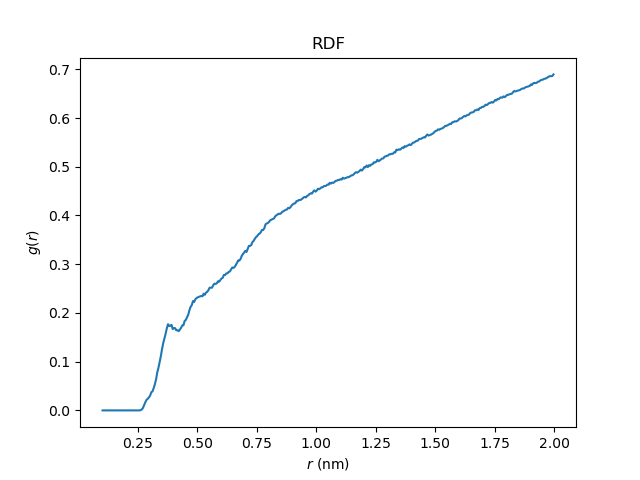

In [7]:
rdf_path = registry.get_mapped_path("fig0_113444")
rdf_path = '/Users/jorgemedina/Desktop/md-agent/ckpt/ckpt_42' + rdf_path.split("ckpt/ckpt_42")[1]
from IPython.display import Image
Image(filename=rdf_path)

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ✅
### No hallucination ✅
### Logic make sense ✅
### Correct Answer  ✅
### Number of steps completed: 3
### % steps completed: 100%